# <centre>Mushroom Analysis</centre>

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:\Data Analysis\Files\mushrooms.csv')
pd.set_option('display.max_columns',None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [143]:
df.shape

(8124, 23)

In [144]:
df.size

186852

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [146]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [147]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [148]:
df.isna().sum().any()

False

Text(0.5, 1.0, 'Poisoness vs Edible count')

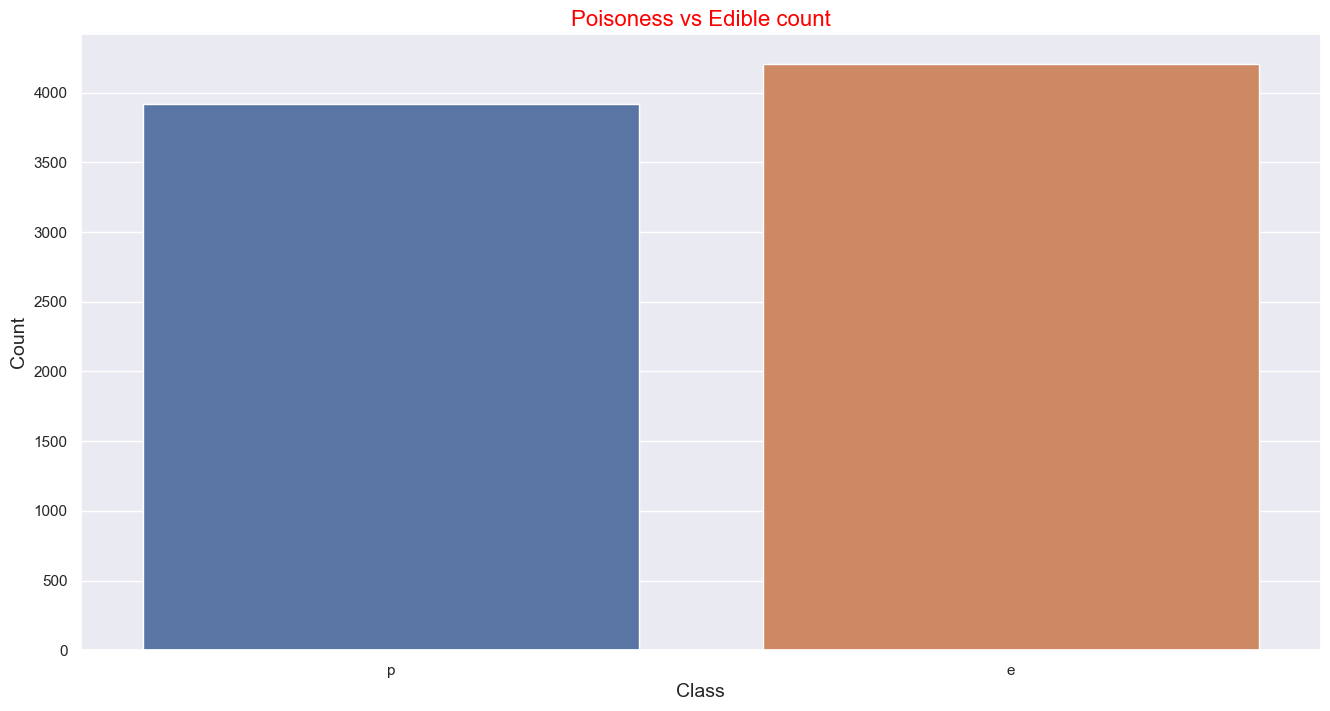

In [149]:
plt.figure(figsize=(16,8))
sns.countplot(df['class'])
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.title('Poisoness vs Edible count',color='Red',size=16)

<ul>
    <li>The above chart depicts that nearly 4200 mushrooms are edible</li>
    <li>Poisoness muchrooms are to be about 3900.</li>

</ul>

In [150]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

It is understood that the dataset here is balanced.

In [151]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [152]:
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3759,0,2,0,2,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,2,5,0
7018,1,5,2,2,0,2,1,0,1,0,1,0,2,2,7,7,0,2,1,0,7,4,0
474,0,2,2,9,1,3,1,1,1,5,1,1,2,2,7,7,0,2,1,4,3,4,0
3776,0,2,3,2,1,5,1,0,0,7,1,1,2,2,7,6,0,2,1,4,3,5,0
4573,1,5,3,3,0,2,1,0,0,2,0,1,1,1,0,4,0,2,1,2,1,5,4


The data has been label encoded accordingly.

In [153]:
df=df.drop(['veil-type'],axis=1)

In [154]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


<AxesSubplot:>

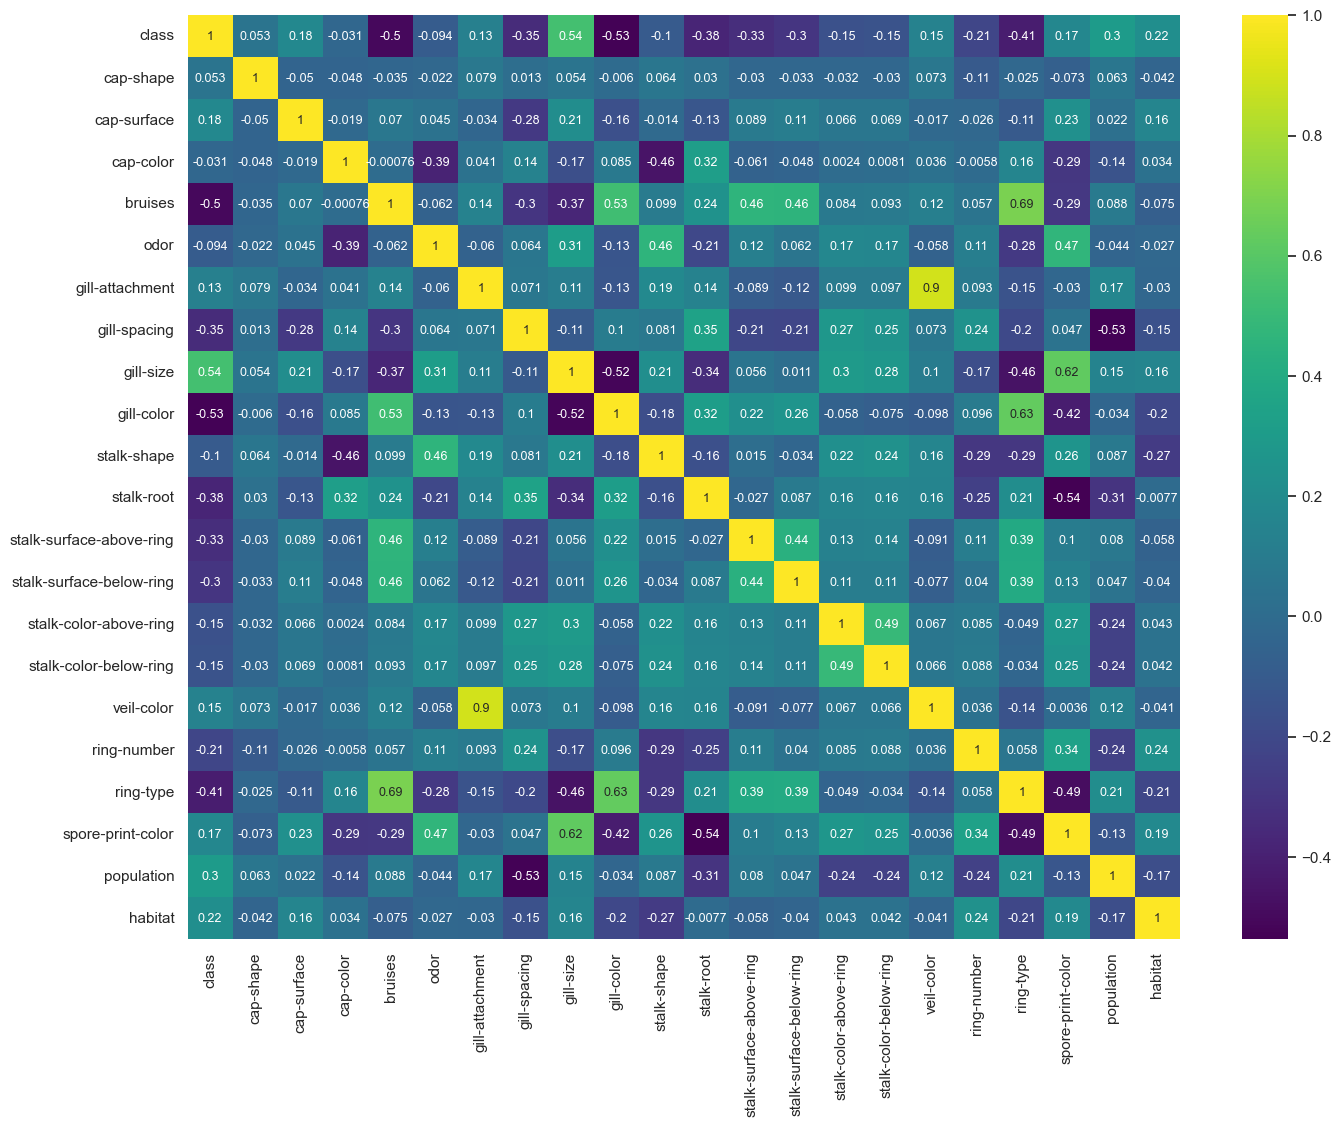

In [155]:
sns.set()
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis',annot_kws={'size':9})

[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-color'),
 Text(16, 0, 'ring-number'),
 Text(17, 0, 'ring-type'),
 Text(18, 0, 'spore-print-color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitat')]

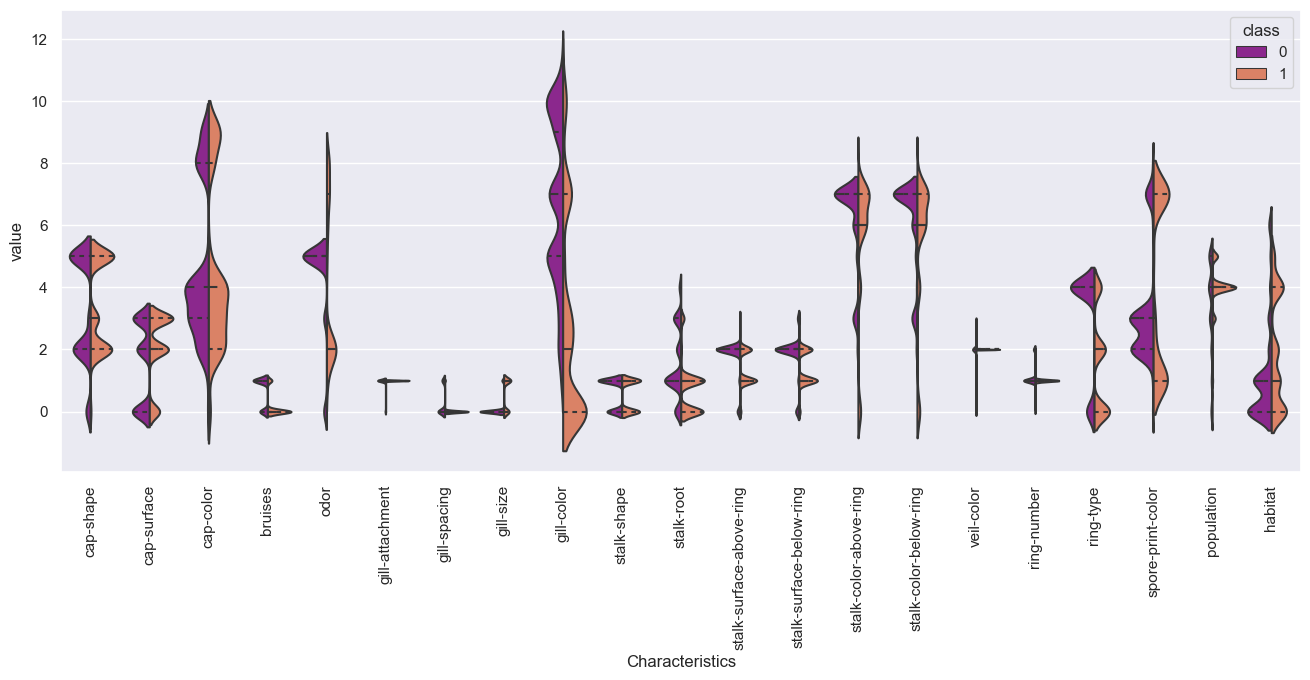

In [156]:
# let's check the distribution of data with respect to class
df_div=pd.melt(df, 'class', var_name= 'Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=df_div, inner ='quartile', palette = 'plasma')
df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))

In [157]:
df['gill-color'].unique()

array([ 4,  5,  2,  7, 10,  3,  9,  1,  0,  8, 11,  6])

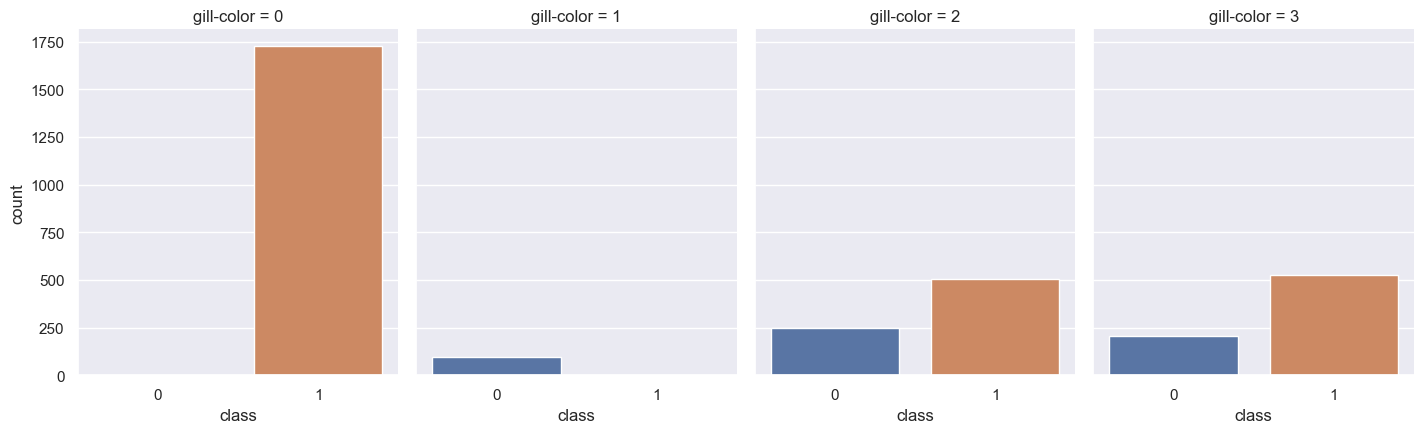

In [158]:
gill_df=df[['class','gill-color']]
gill_df=gill_df[gill_df['gill-color']<=3.5]
sns.factorplot('class',col='gill-color',data=gill_df,kind='count',size=4.5,aspect=.8,col_wrap=4)
plt.show()

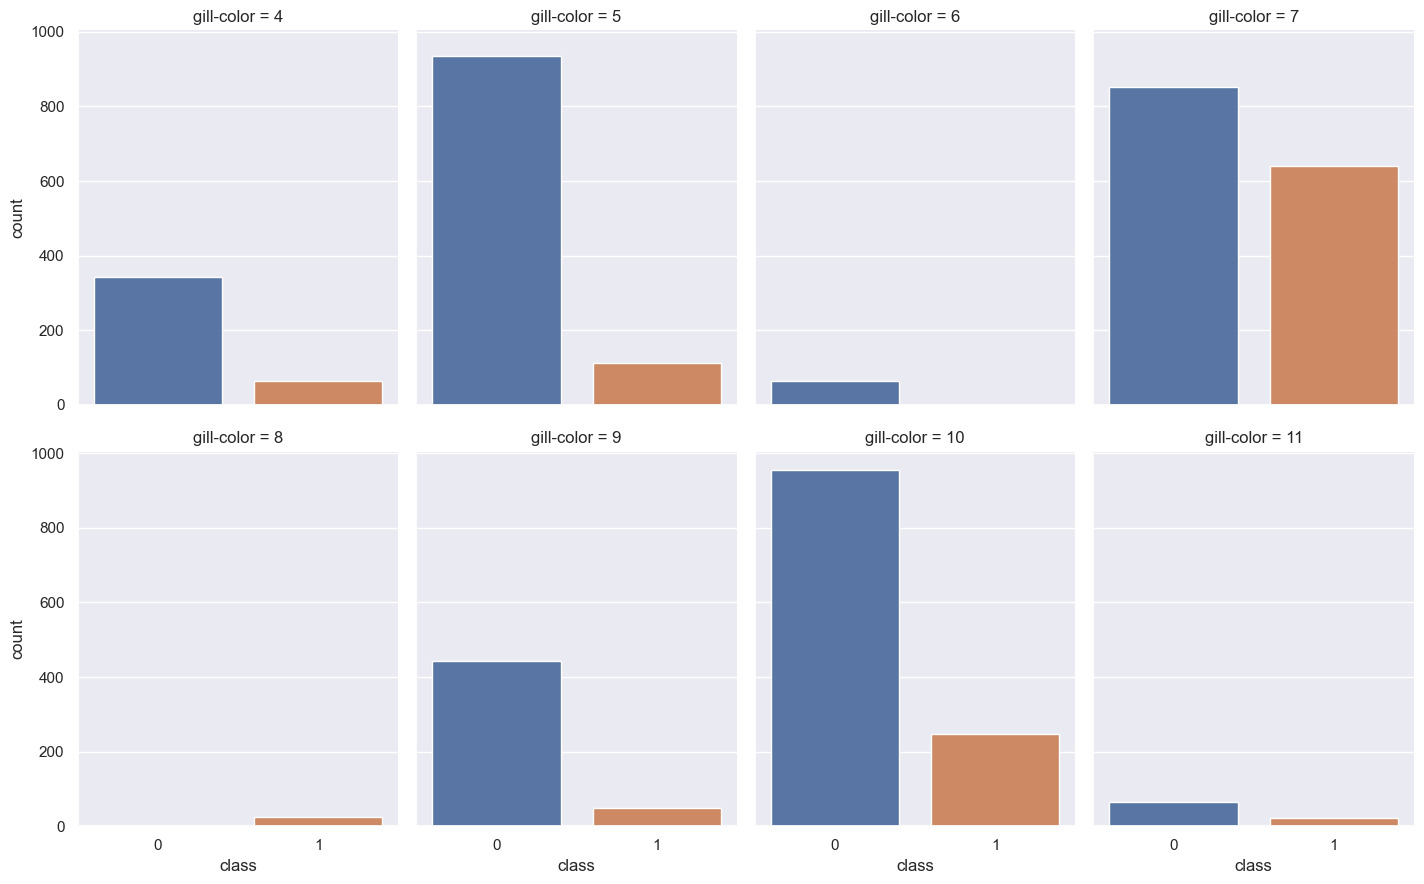

In [159]:
gill_df=df[['class','gill-color']]
gill_df=gill_df[gill_df['gill-color']>3.5]
sns.factorplot('class',col='gill-color',data=gill_df,kind='count',size=4.5,aspect=.8,col_wrap=4)
plt.show()

## Model Prediction Analysis

In [160]:
y=df.iloc[:,0].values
x=df.iloc[:,1:].values
x

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=105)
print(x.shape,x_train.shape,x_test.shape)

(8124, 21) (6499, 21) (1625, 21)


In [162]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-0.83392551,  0.94507744, -0.995728  , ...,  1.43147546,
         0.28402618,  1.46903538],
       [-0.21368267,  0.94507744, -0.995728  , ...,  1.43147546,
         0.28402618,  0.29938626],
       [ 1.02680299,  0.94507744, -0.60324642, ..., -1.08868139,
         1.08658536, -0.2854383 ],
       ...,
       [-0.21368267,  0.1330655 , -0.21076484, ...,  1.43147546,
         0.28402618,  1.46903538],
       [ 1.02680299, -1.49095836, -0.60324642, ..., -0.66865525,
        -0.51853301, -0.2854383 ],
       [ 1.02680299,  0.1330655 , -0.21076484, ...,  1.43147546,
         0.28402618,  1.46903538]])

In [163]:
models=[KNeighborsClassifier(n_neighbors=17),GaussianNB(),SVC(),RandomForestClassifier(),DecisionTreeClassifier(),LogisticRegression()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print('{}:{}'.format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=17):0.9987692307692307

GaussianNB():0.9187692307692308

SVC():1.0

RandomForestClassifier():1.0

DecisionTreeClassifier():1.0

LogisticRegression():0.9495384615384616



## GaussianNB

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       826
           1       0.95      0.94      0.95       799

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



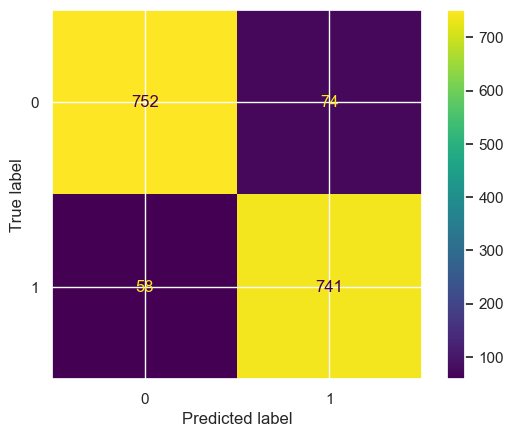

In [164]:
model1=models[1]
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report1=classification_report(y_test,y_pred)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report1)
cmd

## Logistic regression

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       826
           1       0.95      0.94      0.95       799

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



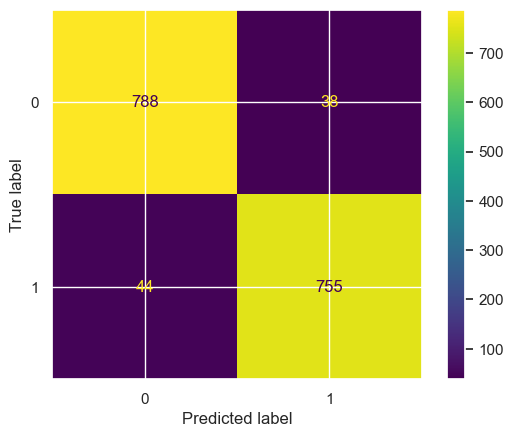

In [165]:
model5=models[5]
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
report5=classification_report(y_test,y_pred)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred5)
print(report5)
cmd

In [166]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([ 1.11731667,  1.18014289,  0.98653695, ...,  0.86473365,
       -0.21387353,  1.0377494 ])

In [167]:
print('Constant values is',reg.intercept_)
print('Slope',reg.coef_)

Constant values is 0.47961224803815994
Slope [-0.00402911  0.02752118 -0.00214992 -0.1763146  -0.04579288 -0.01320328
 -0.17650318  0.25479026 -0.03757103 -0.02407821 -0.07029039 -0.10106484
 -0.03837061 -0.02374514 -0.0124685   0.10200553  0.01116174  0.04055899
 -0.11474477 -0.01416059  0.03223794]


In [168]:
print('Constant values is ',reg.intercept_)
print('Coefficient')
x=list(zip(x,reg.coef_))
x

Constant values is  0.47961224803815994
Coefficient


[(array([5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5]),
  -0.004029107656729797),
 (array([5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 2, 2, 2, 7, 7, 2, 1, 4, 3, 2, 1]),
  0.02752117508334169),
 (array([0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 2, 1, 4, 3, 2, 3]),
  -0.002149919299441739),
 (array([5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 3, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5]),
  -0.17631460461788828),
 (array([5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 3, 2, 2, 7, 7, 2, 1, 0, 3, 0, 1]),
  -0.04579287583406584),
 (array([5, 3, 9, 1, 0, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 2, 1]),
  -0.01320328234081693),
 (array([0, 2, 8, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 2, 3]),
  -0.17650318210197435),
 (array([0, 3, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 2, 1, 4, 3, 3, 3]),
  0.254790257579895),
 (array([5, 3, 8, 1, 6, 1, 0, 1, 7, 0, 3, 2, 2, 7, 7, 2, 1, 4, 2, 4, 1]),
  -0.037571030960478334),
 (array([0, 2, 9, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 3, 3]),
  -0.024078209459990153),
 (array([5

In [169]:
r2score=r2_score(y_test,y_pred)
r2score

0.7275692466169384

In [170]:
df=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
df

,Actual_value,Predicted_value
0,1,1.117317
1,1,1.180143
2,1,0.986537
3,0,0.068240
4,1,0.851887
...,...,...
1620,1,0.981147
1621,0,-0.184124
1622,1,0.864734
1623,0,-0.213874


In [171]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute Error:',mean_absolute_error(y_test,y_pred))

Mean absolute Error: 0.17040435373975574


In [172]:

from sklearn.metrics import mean_absolute_percentage_error
print('Mean absolute percentage error:',mean_absolute_percentage_error(y_test,y_pred))

Mean absolute percentage error: 388662099116760.75


In [173]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE =",mse)
print("RMSE =",rmse)

MSE = 0.06808888578773307
RMSE = 0.26093847126810005


<ul>
    <li>The above analysis through various model's predicts the accuracy score with good values sets.</li>
    <li>By making use of the se model we can classfiy the mushrooms based on edible and poisoness and could interpret based on the analysis.</li>

</ul>